<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Clean" data-toc-modified-id="Clean-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Clean</a></span><ul class="toc-item"><li><span><a href="#Freedom-House-Scores" data-toc-modified-id="Freedom-House-Scores-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Freedom House Scores</a></span></li><li><span><a href="#Continents" data-toc-modified-id="Continents-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Continents</a></span></li><li><span><a href="#Checks-and-Edits" data-toc-modified-id="Checks-and-Edits-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Checks and Edits</a></span></li></ul></li></ul></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration</a></span><ul class="toc-item"><li><span><a href="#Population-Dates" data-toc-modified-id="Population-Dates-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Population Dates</a></span></li><li><span><a href="#Populations-by-Continent-and-by-Countries-of-Continents" data-toc-modified-id="Populations-by-Continent-and-by-Countries-of-Continents-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Populations by Continent and by Countries of Continents</a></span></li><li><span><a href="#Freedom-House-Scores-Globally-and-by-Continent" data-toc-modified-id="Freedom-House-Scores-Globally-and-by-Continent-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Freedom House Scores Globally and by Continent</a></span></li></ul></li><li><span><a href="#Allocation-of-Seats" data-toc-modified-id="Allocation-of-Seats-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Allocation of Seats</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Seat-Allocations" data-toc-modified-id="Seat-Allocations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Seat Allocations</a></span></li><li><span><a href="#National-Citizens-per-Seat" data-toc-modified-id="National-Citizens-per-Seat-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>National Citizens per Seat</a></span></li><li><span><a href="#Continent-Allocations" data-toc-modified-id="Continent-Allocations-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Continent Allocations</a></span></li><li><span><a href="#Freedom-House-Categories" data-toc-modified-id="Freedom-House-Categories-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Freedom House Categories</a></span></li><li><span><a href="#Disproportionality" data-toc-modified-id="Disproportionality-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Disproportionality</a></span></li></ul></li></ul></div>

**Global Parliament Seat Allocation**

This example uses data from [wikirepo](https://github.com/andrewtavis/wikirepo) as a basis for the allocation and analysis of seats for a hypothetical global parliament made up of country delegates given a variable total number of seats.

Notes on the Parliament:
- An upper limit of 1000 seats is set, as no current democracy has a parliament larger than 1000 members

- Settings are considered where a country would be guaranteed to receive zero, one or two seats

- The minimum number of seats is 400 to allow for a two seat minimum for all allocations

- The population of the world is taken to be the sum of the populations of the countries, and is thus inaccurate due to sampling deviations

Resulting parliaments will be analyzed based on their Freedom House index distributions, as well as their allocation of seats to major global powers and organizations (currently just the European Union).

In [1]:
# To avoid exceeding your IOPub rate, you made need to load Jupyter via:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

import numpy as np
import pandas as pd
from datetime import date

import wikirepo
from wikirepo.data import data_utils, lctn_utils, wd_utils

from poli_sci_kit import appointment
from poli_sci_kit import utils

import stdviz
from stdviz.view import disp, add_num_commas
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})

import logging
logging.getLogger().setLevel(logging.CRITICAL) # to disable alerts about empty legend handles 

pd.set_option("display.max_rows", 16)
pd.set_option('display.max_columns', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

# Data Preparation

## Load

The following are the variables needed for the wikirepo query. We'll set `time_lvl` and `timespan` to `None` so that we're only querying the most recent data. For full data transparency, those properties that don't span time will either have the date that they come from appended to their values, or if no date has been provided then this will also be indicated.

We'll first initialize an `EntitiesDict` to store the query's information for later properties, then we'll set the time variables, and the final line assigns `0` to `depth`, as we're dealing with countries and not their constituent regions:

In [2]:
ents_dict = wd_utils.EntitiesDict()

time_lvl = None
timespan = None

depth = 0

The next lines call and print those included location labels that are countries.

**Note:** the following process can be used to query continents by passing `continent` to the `lctn_lvls` argument of `incl_lctn_lbls`, `Earth` by passing `world`, and breakaway or disputed regions by passing `region`. A list can also be passed to the `lctn_lvls` argument.

**Note:** see [examples/us_house_of_rep]() for how to make a `LocationsDict` to query regions at depths greater than `0`.

We'll now load the countries, print them for inspection, and count them:

In [3]:
countries = lctn_utils.incl_lctn_lbls(lctn_lvls='country')
print(*sorted(countries), sep=', ')

Afghanistan, Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Brunei, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Central African Republic, Chad, Chile, Colombia, Comoros, Costa Rica, Croatia, Cuba, Cyprus, Czech Republic, Democratic Republic of the Congo, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Estonia, Eswatini, Ethiopia, Federated States of Micronesia, Fiji, Finland, France, Gabon, Georgia, Germany, Ghana, Greece, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Hungary, Iceland, India, Indonesia, Iran, Iraq, Ireland, Israel, Italy, Ivory Coast, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Kiribati, Kosovo, Kuwait, Kyrgyzstan, Laos, Latvia, Lebanon, Lesotho, Liberia, Libya, Liechten

In [4]:
len(countries)

198

Let's continue by initialize the query, with this being followed by date references being split from the population column, and a loop will remove those columns for organizations we won't consider:

In [5]:
df = wikirepo.data.query(ents_dict=ents_dict,
                         depth=depth, locations=countries,
                         time_lvl=time_lvl, timespan=timespan,
                         demographic_props='population', 
                         economic_props=False, 
                         electoral_poll_props=False, 
                         electoral_result_props=False,
                         geographic_props='continent',
                         institutional_props=['fh_category', 'org_membership'],
                         political_props=False,
                         misc_props=False,
                         verbose=False) # False for web display

df = data_utils.split_col_val_dates(df, col='population')

for col in df.columns:
    if col[:len('mem_')] == 'mem_':
        if col != 'mem_eu':
            df.drop(col, axis=1, inplace = True)

Niue 'Q34020' currently does not have the 'has quality' property 'P1552'.
State of Palestine 'Q219060' currently does not have the 'has quality' property 'P1552'.
Russia 'Q159' currently does not have the 'has quality' property 'P1552'.
Vatican City 'Q237' currently does not have the 'has quality' property 'P1552'.
Kosovo 'Q1246' currently does not have the 'member of' property 'P463'.


## Clean

In [6]:
df_countries = df.copy()

### Freedom House Scores

The Freedom House scores in Wikidata are from different years, with the year further often not being indicated except for in the source, but we'll take them as a general indicator. First we need to input those values that are missing for Freedom House categories by checking [their recent report](https://freedomhouse.org/countries/freedom-world/scores). 

Let's first check the values:

In [7]:
df_countries['fh_category'] = [c.replace(' (no date)', '') for c in df_countries['fh_category']]

df_countries['fh_category'].unique()

array(['not-free', 'partly free', 'free', 'democracy',
       'Jewish and democratic state', 'nan'], dtype=object)

In [8]:
df_countries[df_countries['fh_category'] == 'nan']

,location,population,population_date,continent,fh_category,mem_eu
124,Niue,1612,2016-01-01,Oceania,nan,False
131,State of Palestine,4684777,2017-01-01,Asia,nan,False
143,Russia,146800000,2020-01-01,"Europe, Asia",nan,False
192,Vatican City,1000,2017-01-01,Europe,nan,False


In [9]:
df_countries[df_countries['fh_category'] == 'democracy']

,location,population,population_date,continent,fh_category,mem_eu
9,Austria,8809212,2017-01-01,Europe,democracy,True


In [10]:
df_countries[df_countries['fh_category'] == 'Jewish and democratic state']

,location,population,population_date,continent,fh_category,mem_eu
78,Israel,9187000,2020-04-01,Asia,Jewish and democratic state,False


Niue, and island country of 1600 people, and the Vatican don't have Freedom House scores, and will be assumed to be free. The following fixes all missing or incorrect data:

In [11]:
df_countries.loc[df_countries[df_countries['location'] == 'Austria'].index, 'fh_category'] = 'free'
df_countries.loc[df_countries[df_countries['location'] == 'Israel'].index, 'fh_category'] = 'free'
df_countries.loc[df_countries[df_countries['location'] == 'Niue'].index, 'fh_category'] = 'free'
df_countries.loc[df_countries[df_countries['location'] == 'State of Palestine'].index, 'fh_category'] = 'not-free'
df_countries.loc[df_countries[df_countries['location'] == 'Russia'].index, 'fh_category'] = 'not-free'
df_countries.loc[df_countries[df_countries['location'] == 'Vatican City'].index, 'fh_category'] = 'free'

In [12]:
disp(df_countries, 5)

,location,population,population_date,continent,fh_category,mem_eu
0,Afghanistan,34940837,2018-01-01,Asia,not-free,False
1,Albania,2873457,2017-01-01,Europe,partly free,False
2,Algeria,41318142,2017-01-01,Africa,not-free,False
3,Andorra,76177,2018-01-01,Europe,free,False
4,Angola,29784193,2017-01-01,Africa,not-free,False


(198, 6)

Let's replace `not-free` by `not free` and check the unique values:

In [13]:
df_countries['fh_category'] = df_countries['fh_category'].replace("not-free", "not free")

In [14]:
df_countries['fh_category'].unique()

array(['not free', 'partly free', 'free'], dtype=object)

### Continents

We'll now check those countries that span over more than one continent:

In [15]:
disp(df_countries[df_countries['continent'].str.contains(",")], \
     len(df_countries[df_countries['continent'].str.contains(",")]))

,location,population,population_date,continent,fh_category,mem_eu
7,Armenia,2930450,2017-01-01,"Asia, Europe",partly free,False
10,Azerbaijan,10127874,2019-08-01,"Asia, Europe",not free,False
39,Cyprus,1141166,2013-01-01,"Asia, Europe",free,True
42,Denmark,5827463,2019-10-01,"Europe, North America",free,True
48,Egypt,94798827,2017-03-28,"Africa, Asia",not free,False
58,France,67118648,2017-01-01,"Europe, Africa, Americas, Oceania, Antarctica",free,True
60,Georgia,3717100,2017-01-01,"Asia, Europe",partly free,False
79,Italy,60317000,2020-01-01,"Europe, Africa",free,True
84,Kazakhstan,18276500,2018-01-01,"Europe, Asia",not free,False
119,Netherlands,17282163,2019-01-01,"Europe, Central America",free,False


(17, 6)

It looks like generally taking the first continent is an appropriate choice, so we'll do this for all multi-continent countries:

In [16]:
df_countries['continent'] = [i.split(',')[0] if ',' in i else i for i in df_countries['continent']]

In [17]:
df_countries[df_countries['location'] == 'France']

,location,population,population_date,continent,fh_category,mem_eu
58,France,67118648,2017-01-01,Europe,free,True


### Checks and Edits

Let's close the cleaning section checking to see if there are countries without population data, counting the number of members of the European Union as a check, and shortening some country names for nicer plots:

In [18]:
df_countries['population'].isnull().values.any()

False

In [19]:
len(df_countries[df_countries['mem_eu'] == True]) # should be 27

26

In [20]:
df_countries['location'] = df_countries['location'].replace("People's Republic of China", "China")
df_countries['location'] = df_countries['location'].replace("Democratic Republic of the Congo", "DR Congo")
df_countries['location'] = df_countries['location'].replace("Federated States of Micronesia", "FS Micronesia")
df_countries['location'] = df_countries['location'].replace("Federated States of Micronesia", "FS Micronesia")
df_countries['location'] = df_countries['location'].replace("Saint Vincent and the Grenadines", "Saint Vincent")
df_countries.sort_values('location', inplace=True, ascending=True)
df_countries.reset_index(drop=True, inplace=True)

# Exploration

The subsections here explore the dates that the populations came from, the populations of continents and countries per continent, and Freedom House scores globally and by continent.

## Population Dates

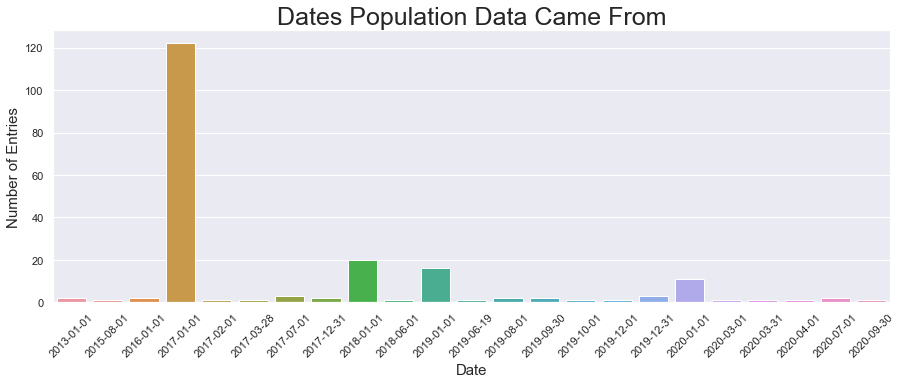

In [21]:
df_countries.sort_values('population_date', inplace=True, ascending=True)
ax = sns.countplot(data=df_countries, x='population_date')

ax.axes.set_title('Dates Population Data Came From', fontsize=25)
ax.set_ylabel('Number of Entries', fontsize=15)
ax.set_xticklabels(labels=df_countries['population_date'].unique(), rotation=45)
ax.set_xlabel('Date', fontsize=15)

plt.show()

df_countries.sort_values('location', inplace=True, ascending=True)

## Populations by Continent and by Countries of Continents

In [22]:
continent_pops = []
for c in df_countries['continent'].unique():
    df_c = df_countries.copy()
    df_c = df_c[df_c['continent'] == c]
    continent_pops.append(df_c['population'].sum())

idxs_by_pop = np.argsort(continent_pops)[::-1]
sorted_pops = [continent_pops[i] for i in idxs_by_pop]
sorted_continents = [list(df_countries['continent'].unique())[i] for i in idxs_by_pop]

In [23]:
sorted_continents

['Asia', 'Africa', 'Europe', 'North America', 'South America', 'Oceania']

In [24]:
sorted_pops

[4487486014, 1251811452, 764836017, 583651648, 422169957, 41286363]

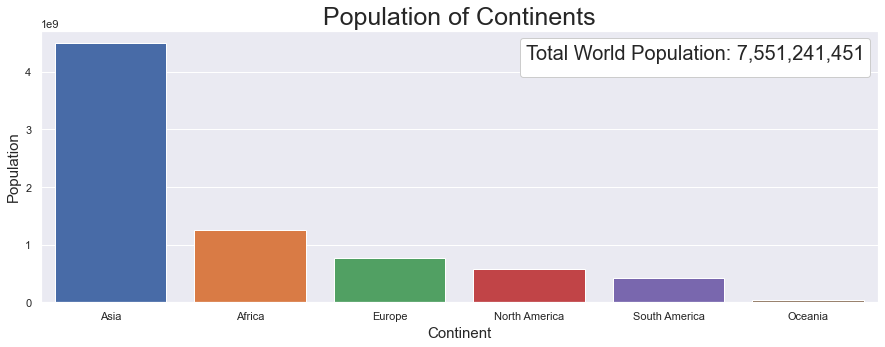

In [25]:
ax = stdviz.plot.bar(counts=sorted_pops, names=sorted_continents, 
                     faction_names=None, colors=None, 
                     horizontal=False, stacked=False, 
                     label_bars=False, axis=None)

# Initialize empty handles and labels
handles, labels = stdviz.plot.legend.gen_elements(counts=None, names=None, colors=None, 
                                                  size=10, marker='o', padding_indexes=3,
                                                  order=None)

ax.legend(handles=handles, labels=labels,
          title='Total World Population: {}'.format(add_num_commas(sum(sorted_pops))), 
          bbox_to_anchor=(1, 1),
          title_fontsize=20, fontsize=15, 
          ncol=2, loc='upper right', 
          frameon=True, facecolor='#ffffff', framealpha=1)

ax.axes.set_title('Population of Continents', fontsize=25)
ax.set_ylabel('Population', fontsize=15)
ax.set_xticklabels(labels=sorted_continents, rotation=0)
ax.set_xlabel('Continent', fontsize=15)

plt.show()

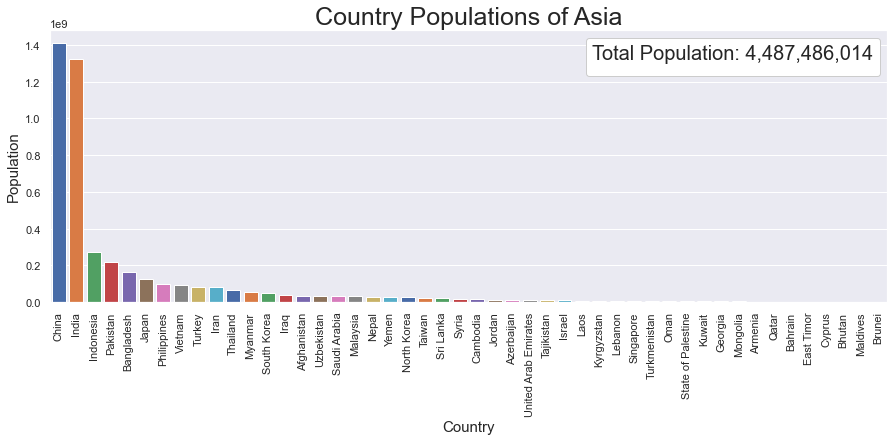

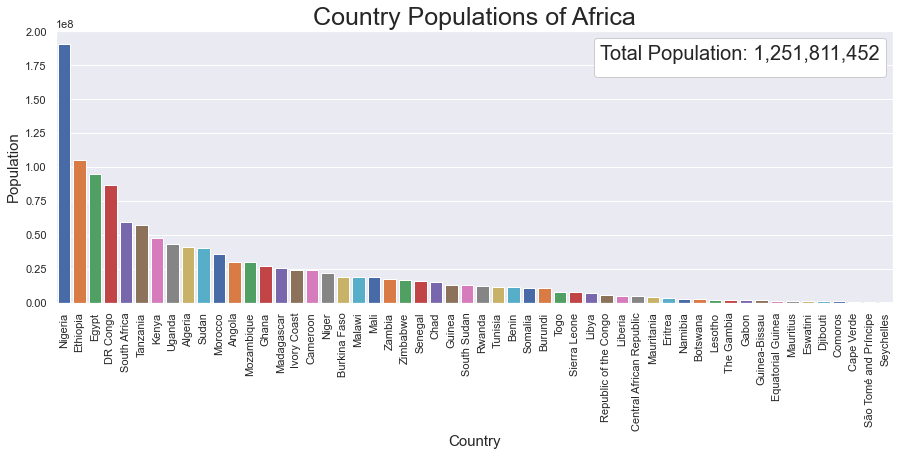

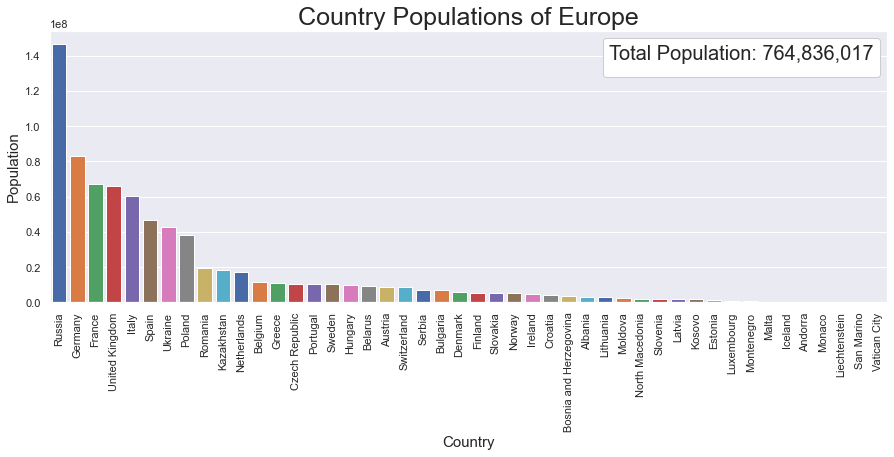

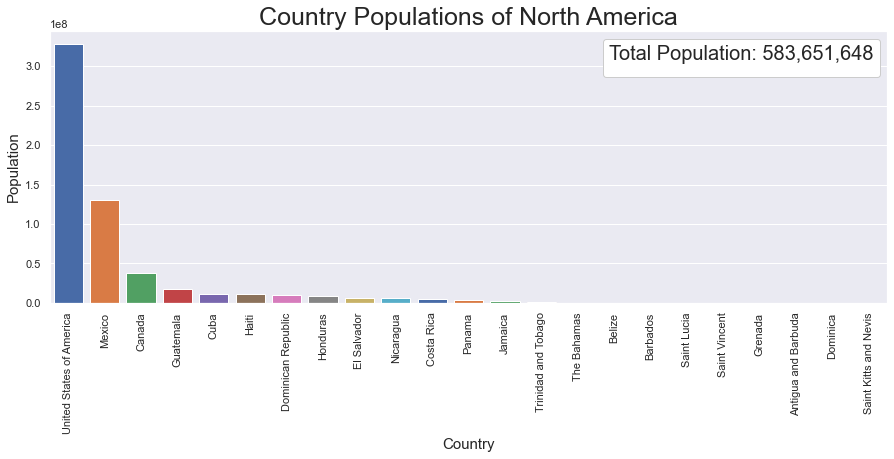

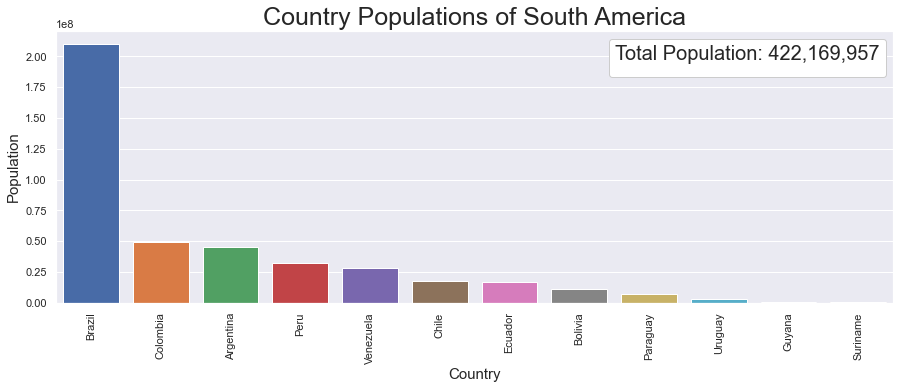

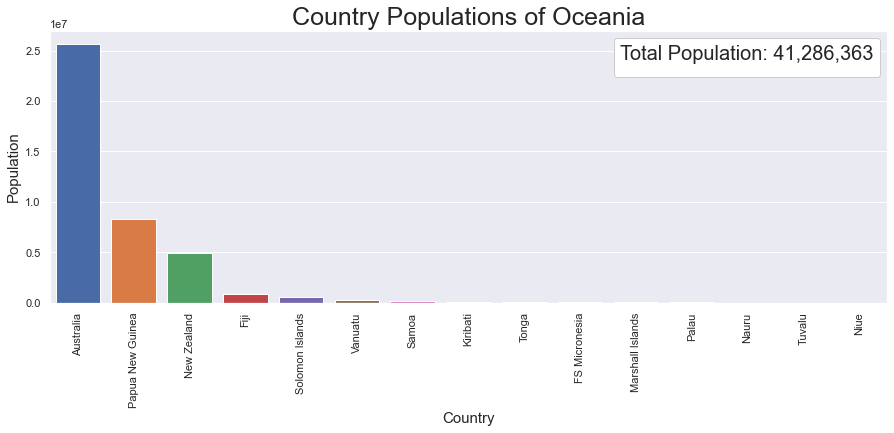

In [26]:
for c in sorted_continents:
    df_c = df_countries.copy()
    df_c = df_c[df_c['continent'] == c]
    df_c.sort_values('population', inplace=True, ascending=False)
    ax = stdviz.plot.bar(counts=df_c['population'], names=df_c['location'], 
                         faction_names=None, colors=None, 
                         horizontal=False, stacked=False, 
                         label_bars=False, axis=None)
    
    # Initialize empty handles and labels
    handles, labels = stdviz.plot.legend.gen_elements(counts=None, names=None, colors=None, 
                                                      size=10, marker='o', padding_indexes=3,
                                                      order=None)

    ax.legend(handles=handles, labels=labels,
              title='Total Population: {}'.format(add_num_commas(df_c['population'].sum())), 
              bbox_to_anchor=(1, 1),
              title_fontsize=20, fontsize=15, 
              ncol=2, loc='upper right', 
              frameon=True, facecolor='#ffffff', framealpha=1)
    
    ax.axes.set_title('Country Populations of {}'.format(c), fontsize=25)
    ax.set_ylabel('Population', fontsize=15)
    ax.set_xticklabels(labels=df_c['location'], rotation=90)
    ax.set_xlabel('Country', fontsize=15)

    plt.show()

## Freedom House Scores Globally and by Continent

In [27]:
world_pop = df_countries['population'].sum()
fh_counts = data_utils.count_df_prop_vals(df=df_countries, 
                                          col='fh_category', 
                                          percent=True)

print('Earth')
print('{}{} countries {}{} people'.format(' ' * (len('partly free: ')),
                                         len(df_countries),
                                         ' ' * 3,
                                         add_num_commas(world_pop)))
for i in range(len(fh_counts)):
    print('{}:{} {} {}{}'.format(fh_counts.index[i],
                                 ' ' * (max(len(idx) for idx in fh_counts.index) - \
                                            len(fh_counts.index[i])),
                                 round(fh_counts.values[i], 3),
                                 ' ' * 11,
                                 round(df_countries[df_countries['fh_category'] == fh_counts.index[i]]['population'].sum() / \
                                           world_pop, 3)))

Earth
             198 countries    7,551,241,451 people
free:        0.449            0.389
not free:    0.253            0.359
partly free: 0.298            0.253


In [28]:
for c in sorted_continents:
    df_c = df_countries.copy()
    df_c = df_countries[df_countries['continent'] == c]
    cont_pop = df_c['population'].sum()
    fh_counts = data_utils.count_df_prop_vals(df=df_c, 
                                              col='fh_category', 
                                              percent=True)

    print(c)
    print('{}{} countries {}{} people'.format(' ' * (len('partly free: ')),
                                             len(df_c),
                                             ' ' * 4,
                                             add_num_commas(cont_pop)))
    for i in range(len(fh_counts)):
        print('{}:{} {} {}{}'.format(fh_counts.index[i],
                                     ' ' * (max(len(idx) for idx in fh_counts.index) - \
                                                len(fh_counts.index[i])),
                                     round(fh_counts.values[i], 3),
                                     ' ' * 11,
                                     round(df_c[df_c['fh_category'] == fh_counts.index[i]]['population'].sum() / \
                                               cont_pop, 3)))
    
    if c != sorted_continents[-1]:
        print('\n')

Asia
             48 countries     4,487,486,014 people
free:        0.146            0.343
not free:    0.458            0.431
partly free: 0.396            0.226


Africa
             54 countries     1,251,811,452 people
free:        0.185            0.105
not free:    0.426            0.447
partly free: 0.389            0.448


Europe
             46 countries     764,836,017 people
free:        0.783            0.699
not free:    0.065            0.228
partly free: 0.152            0.073


North America
             23 countries     583,651,648 people
free:        0.696            0.664
not free:    0.043            0.02
partly free: 0.261            0.316


South America
             12 countries     422,169,957 people
free:        0.583            0.735
not free:    0.083            0.068
partly free: 0.333            0.198


Oceania
             15 countries     41,286,363 people
free:        0.867            0.778
partly free: 0.133            0.222


# Allocation of Seats

For seat allocation we'll be using the [Webster method](https://en.wikipedia.org/wiki/Webster/Sainte-Lagu%C3%AB_method) (named for former US Senator and Secretary of State Daniel Webster), which is also known as the Sainte-Laguë method (named for the French mathematician André Sainte-Laguë). It is a version of highest average apportionment, where in this case the populations of each country will be iteratively divided by a uniquely determined denominator that is derived from the number of seats each has already received. The Webster method used to be used for allocations of seats to states in the US House of Representatives before being replaced with the Huntington-Hill method (with the latter favoring smaller states). It is used in many countries and regions around the world, and among highest average methods is known to generally derive the smallest deviation from ideal shares.

Each country starts with zero seats, and the next seat is given to the state that has the highest quotient after division. The divisor $D_{ci}$ for a country $c$ at any given iteration $i$ given its population $P_c$ and current seat allocation $a_{ci}$ is:

$$D_{ci} = \frac{P_c}{(2 \cdot a_{ci}) + 1}$$

Whichever country $c$ that has the highest value $D_{ci}$ gets the next seat to be allocated, and then the divisors are calculated again for all countries given the newest allocation.

For a smooth and expansive look at the how representation would change, we'll consider all total seat caps between 400 and 1000 by increments of twenty five. 1000 is again chosen because no current democracy has a parliament with more seats, and 400 is to allow allocations with two seats guaranteed per country. The possible totals are defined in the following line:

In [29]:
seat_limits = list(range(400, 1000 + 25, 25)) # + 10 to include 1000
seat_limits[:5]

[400, 425, 450, 475, 500]

We'll now allocate seats to countries based on the aforementioned limits using a standard Webster method allocation over minimum allocations of `0`, `1` and `2` seats:

In [30]:
min_seat_amounts = [0, 1, 2]

In [31]:
for msa in min_seat_amounts:
    for limit in seat_limits:
        df_countries.loc[:, 'msa_{}_{}'.format(msa, limit)] = \
                pd.Series(appointment.methods.highest_average(averaging_style='Webster',
                                                              shares=df_countries['population'], 
                                                              total_alloc=limit, 
                                                              alloc_threshold=None, 
                                                              min_alloc=msa, 
                                                              tie_break ='majority', 
                                                              majority_bonus=False, 
                                                              modifier=None),
                                                              index=range(len(df_countries)))

To show the importance of minimum seat limits, the following cells plot how many countries still don't have a representative at each seat limit:

In [32]:
percent_no_seat_per_limit = [len(df_countries[df_countries['msa_0_{}'.format(limit)] == 0]) / len(df_countries) \
                                 for limit in seat_limits]

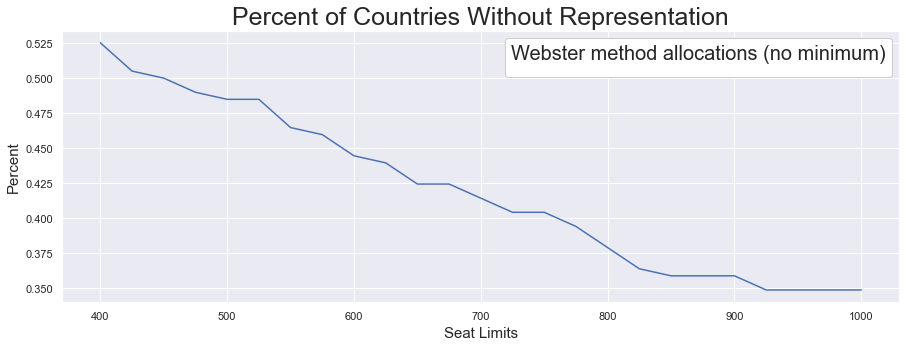

In [33]:
ax = sns.lineplot(x=seat_limits, y=percent_no_seat_per_limit)

# Initialize empty handles and labels
handles, labels = stdviz.plot.legend.gen_elements(counts=None, names=None, colors=None, 
                                                  size=10, marker='o', padding_indexes=3,
                                                  order=None)

ax.legend(handles=handles, labels=labels,
          title='Webster method allocations (no minimum)', 
          bbox_to_anchor=(1, 1),
          title_fontsize=20, fontsize=15, 
          ncol=2, loc='upper right', 
          frameon=True, facecolor='#ffffff', framealpha=1)

ax.axes.set_title('Percent of Countries Without Representation', fontsize=25)
ax.set_xlabel('Seat Limits', fontsize=15)
ax.set_ylabel('Percent', fontsize=15)

plt.show()

To give a simple impression of how representation in country based global parliaments would change given seat limits, we'll look at how the following countries or groups are represented:

1. The European Union
2. The United States
3. China
4. Brazil
5. Russia
6. A country with a third quartile population
7. A country with a close to median population
8. A country with a population close to one million

It should be noted that numbers for India would be similar to those of China. The latter three countries are derived in the following lines, and will not come from Europe:

In [34]:
third_q_pop = np.percentile(df_countries['population'], 75)
closest_pop_to_q3 = min(df_countries[df_countries['continent'] != 'Europe']['population'], key=lambda x:abs(x - third_q_pop))
country_closest_to_q3 = df_countries[df_countries['population'] == closest_pop_to_q3]['location'].values[0]

print(country_closest_to_q3)
print(add_num_commas(closest_pop_to_q3))

Ghana
26,908,262


In [35]:
median_pop = np.median(df_countries['population'])
closest_pop_to_median = min(df_countries[df_countries['continent'] != 'Europe']['population'], key=lambda x:abs(x - median_pop))
country_closest_to_median = df_countries[df_countries['population'] == closest_pop_to_median]['location'].values[0]

print(country_closest_to_median)
print(add_num_commas(closest_pop_to_median))

Papua New Guinea
8,251,162


In [36]:
closest_pop_to_1_mil =  min(df_countries[df_countries['continent'] != 'Europe']['population'], key=lambda x:abs(x - 1000000))
country_closest_to_1_mil = df_countries[df_countries['population'] == closest_pop_to_1_mil]['location'].values[0]

print(country_closest_to_1_mil)
print(add_num_commas(closest_pop_to_1_mil))

Djibouti
956,985


Let's quickly look at how many and what percentage of countries have less than one million people, as this will give us an impression of how they are also being represented:

In [37]:
num_less_than_1_mil = len(df_countries[df_countries['population'] < 1000000])
num_less_than_1_mil

40

In [38]:
round(num_less_than_1_mil / len(df_countries), 3)

0.202

And now the list of countries to consider in plots is defined, with a row for the European Union then being made after checking that all EU countries are free based on Freedom House's analysis:

In [66]:
selected_countries = ['United States of America',
                      'China',
                      'Brazil',
                      'Russia',
                      country_closest_to_q3,
                      country_closest_to_median,
                      country_closest_to_1_mil]

In [67]:
df_selected = df_countries.copy()
df_selected = df_selected[df_selected['location'].isin(selected_countries)]

In [68]:
df_eu = df_countries.copy()
df_eu = df_eu[df_eu['mem_eu'] == True]

In [69]:
df_eu['fh_category'].all() == 'free'

True

In [70]:
if 'European Union' not in list(df_selected['location']):
    df_selected.loc[len(df_selected), 'location'] = 'European Union'

    df_selected.loc[df_selected[df_selected['location'] == 'European Union'].index, 'population'] = \
        df_eu['population'].sum()
    df_selected.loc[df_selected[df_selected['location'] == 'European Union'].index, 'population_date'] = \
        time_utils.truncate_date(date.today(), 'daily')
    df_selected.loc[df_selected[df_selected['location'] == 'European Union'].index, 'continent'] = 'Europe'
    df_selected.loc[df_selected[df_selected['location'] == 'European Union'].index, 'fh_category'] = 'free'
    df_selected.loc[df_selected[df_selected['location'] == 'European Union'].index, 'mem_eu'] = True

for msa in min_seat_amounts:
    for limit in seat_limits:
        df_selected.loc[df_selected[df_selected['location'] == 'European Union'].index, \
                            'msa_{}_{}'.format(msa, limit)] = \
                                df_eu['msa_{}_{}'.format(msa, limit)].sum()

In [44]:
df_selected = df_selected.sort_values(by=['population'], ascending=False)
for msa in min_seat_amounts:
    for limit in seat_limits:
        df_selected['msa_{}_{}'.format(msa, limit)] = df_selected['msa_{}_{}'.format(msa, limit)].astype(int)
df_selected.reset_index(drop=True, inplace=True)
df_selected

,location,population,population_date,continent,fh_category,mem_eu,msa_0_400,msa_0_425,msa_0_450,msa_0_475,msa_0_500,msa_0_525,msa_0_550,msa_0_575,msa_0_600,msa_0_625,msa_0_650,msa_0_675,msa_0_700,msa_0_725,msa_0_750,msa_0_775,msa_0_800,msa_0_825,msa_0_850,msa_0_875,msa_0_900,msa_0_925,msa_0_950,msa_0_975,msa_0_1000,msa_1_400,msa_1_425,msa_1_450,msa_1_475,msa_1_500,msa_1_525,msa_1_550,msa_1_575,msa_1_600,msa_1_625,msa_1_650,msa_1_675,msa_1_700,msa_1_725,msa_1_750,msa_1_775,msa_1_800,msa_1_825,msa_1_850,msa_1_875,msa_1_900,msa_1_925,msa_1_950,msa_1_975,msa_1_1000,msa_2_400,msa_2_425,msa_2_450,msa_2_475,msa_2_500,msa_2_525,msa_2_550,msa_2_575,msa_2_600,msa_2_625,msa_2_650,msa_2_675,msa_2_700,msa_2_725,msa_2_750,msa_2_775,msa_2_800,msa_2_825,msa_2_850,msa_2_875,msa_2_900,msa_2_925,msa_2_950,msa_2_975,msa_2_1000
0,China,1.409517e+09,2017-07-01,Asia,not free,False,76,81,85,90,95,100,105,110,114,117,122,127,131,136,141,146,150,154,159,165,169,174,179,184,189,55,60,64,71,75,81,85,91,96,101,106,111,116,120,125,130,135,140,145,150,156,160,166,171,175,4,15,24,31,38,44,52,58,63,70,75,81,86,92,97,103,108,114,119,124,129,135,140,145,150
1,European Union,4.307107e+08,2020-12-05,Europe,free,True,23,25,26,26,29,29,30,33,34,35,36,37,41,42,43,44,45,46,47,49,50,51,54,55,56,32,35,35,35,36,38,39,39,42,42,44,46,47,47,47,50,50,52,53,53,54,55,57,58,59,52,52,52,52,52,53,53,54,56,56,57,59,60,61,63,63,65,66,67,67,70,70,72,73,73
2,United States of America,3.282395e+08,2019-01-01,North America,free,False,18,19,20,21,22,23,24,26,27,27,28,30,30,32,33,34,35,36,37,38,39,41,42,43,44,13,14,15,16,17,19,20,21,22,23,25,26,27,28,29,30,31,32,34,35,36,37,39,40,41,2,4,5,7,9,10,12,13,15,16,17,19,20,21,23,24,25,27,28,29,30,31,32,34,35
3,Brazil,2.101471e+08,2019-01-01,South America,free,False,11,12,13,13,14,15,16,16,17,18,18,19,20,20,21,22,22,23,24,25,25,26,27,27,28,8,9,10,11,11,12,13,14,14,15,16,17,17,18,19,19,20,21,22,22,23,24,25,25,26,2,2,4,5,6,7,8,9,9,10,11,12,13,14,14,15,16,17,18,19,19,20,21,22,22
4,Russia,1.468000e+08,2020-01-01,Europe,not free,False,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,6,6,7,7,8,8,9,9,10,10,11,12,12,13,13,13,14,15,15,16,16,17,17,18,18,2,2,2,3,4,5,5,6,7,7,8,8,9,10,10,11,11,12,12,13,13,14,15,15,16
5,Ghana,2.690826e+07,2017-01-01,Africa,free,False,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,4,4,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3
6,Papua New Guinea,8.251162e+06,2017-01-01,Oceania,partly free,False,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7,Djibouti,9.569850e+05,2017-01-01,Africa,not free,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


# Results

## Seat Allocations

Let's first look at the seat allocations situations where one seat is guaranteed, as for the countries selected seat minimums will generally have little effect on the distribution of allocations:

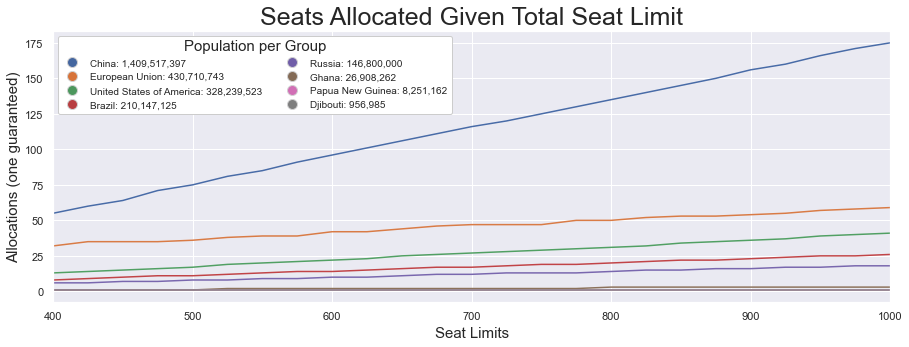

In [45]:
ax = stdviz.plot.comp_line(df=df_selected, 
                           dependent_cols=[c for c in df_selected.columns \
                                               if c[:len('msa_1')] == 'msa_1'], 
                           indep_stats=seat_limits,
                           lctn_col=None,
                           colors=None, 
                           stacked=False, 
                           percent=False, 
                           axis=None)

colors = [utils.rgb_to_hex(c) for c in sns.color_palette(n_colors=len(df_selected), desat=1)]
handles = stdviz.plot.legend.gen_handles(colors=colors, size=10, marker='o')
labels = ['{}: {}'.format(df_selected.loc[i, 'location'], \
                          add_num_commas(int(df_selected.loc[i, 'population']))) \
                          for i in df_selected.index]

ax.legend(handles=handles, labels=labels, 
          title='Population per Group',
          bbox_to_anchor=(0, 1),
          ncol=2, loc='upper left', fontsize=10, 
          title_fontsize=15, 
          frameon=True, facecolor='#ffffff', framealpha=1)

ax.axes.set_title('Seats Allocated Given Total Seat Limit', fontsize=25)
ax.set_xlabel('Seat Limits', fontsize=15)
ax.set_ylabel('Allocations (one guaranteed)', fontsize=15)

plt.show()

## National Citizens per Seat

Let's now consider the number of citizens that would be represented by each seat that a country has been alloted:

In [46]:
for limit in seat_limits:
    df_selected.loc[:, 'cps_msa_1_{}'.format(limit)] = \
        df_selected['population'] / df_selected['msa_1_{}'.format(limit)]

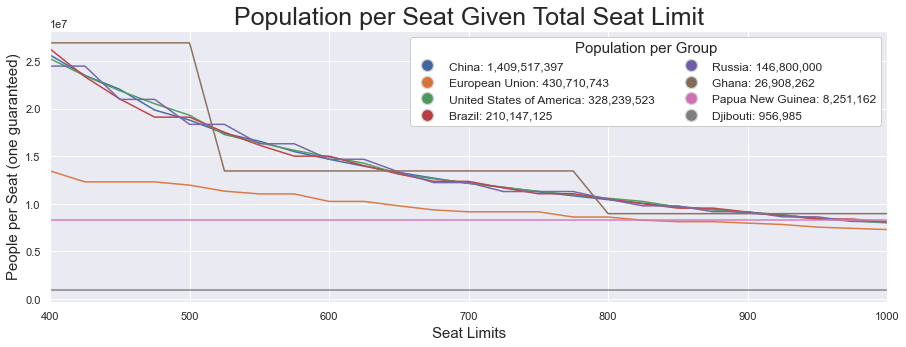

In [47]:
ax = stdviz.plot.comp_line(df=df_selected, 
                           dependent_cols=[c for c in df_selected.columns \
                                               if c[:len('cps_msa_1_')] == 'cps_msa_1_'], 
                           indep_stats=seat_limits,
                           lctn_col=None,
                           colors=None, 
                           stacked=False, 
                           percent=False, 
                           axis=None)

colors = [utils.rgb_to_hex(c) for c in sns.color_palette(n_colors=len(df_selected), desat=1)]
handles = stdviz.plot.legend.gen_handles(colors=colors, size=12, marker='o')
labels = ['{}: {}'.format(df_selected.loc[i, 'location'], \
                          add_num_commas(int(df_selected.loc[i, 'population']))) \
                          for i in df_selected.index]

ax.legend(handles=handles, labels=labels, 
          title='Population per Group',
          bbox_to_anchor=(1, 1),
          ncol=2, loc='upper right', fontsize=12, 
          title_fontsize=15, 
          frameon=True, facecolor='#ffffff', framealpha=1)

ax.axes.set_title('Population per Seat Given Total Seat Limit', fontsize=25)
ax.set_xlabel('Seat Limits', fontsize=15)
ax.set_ylabel('People per Seat (one guaranteed)', fontsize=15)

plt.show()

## Continent Allocations

Here we'll show how many seats each continent would receive at each limit - again considering a one seat minimum:

In [48]:
df_cont_alloc = pd.DataFrame(columns=['alloc_{}'.format(limit) for limit in seat_limits])
for i in range(len(sorted_continents)):
    df_cont_alloc.loc[i] = [round(df_countries[df_countries['continent'] == sorted_continents[i]]['msa_1_{}'.format(limit)].sum() / limit, 5) \
                              for limit in seat_limits]

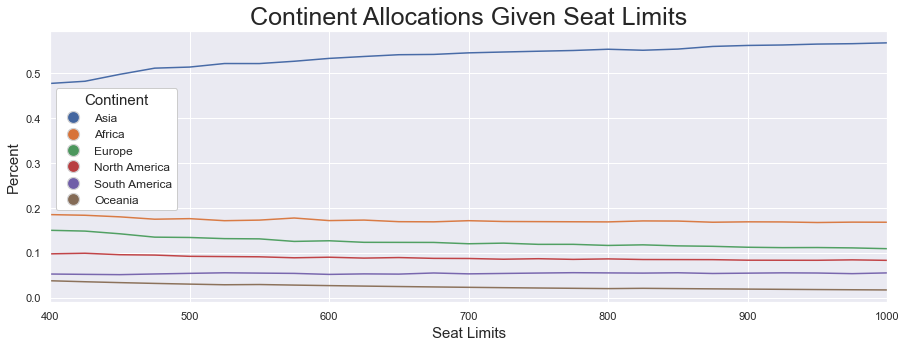

In [72]:
ax = stdviz.plot.comp_line(df=df_cont_alloc, 
                           dependent_cols=['alloc_{}'.format(limit) for limit in seat_limits], 
                           indep_stats=seat_limits,
                           lctn_col=None,
                           colors=None, 
                           stacked=False, 
                           percent=False, 
                           axis=None)

colors = [utils.rgb_to_hex(c) for c in sns.color_palette(n_colors=len(df_selected), desat=1)]
handles = stdviz.plot.legend.gen_handles(colors=colors, size=12, marker='o')
labels = sorted_continents

ax.legend(handles=handles, labels=labels, 
          title='Continent',
          bbox_to_anchor=(0, 0.81),
          ncol=1, loc='upper left', fontsize=12, 
          title_fontsize=15, 
          frameon=True, facecolor='#ffffff', framealpha=1)

ax.axes.set_title('Continent Allocations Given Seat Limits', fontsize=25)
ax.set_xlabel('Seat Limits', fontsize=15)
ax.set_ylabel('Percent', fontsize=15)

plt.show()

## Freedom House Categories

We'll now look at how delegates come from free, not free, and partly free countries given seat limits and a one seat minimum allocation:

In [50]:
df_fh_alloc = pd.DataFrame(columns=['prcnt_in_limit_{}'.format(limit) for limit in seat_limits])
categories = ['free', 'not free', 'partly free']
for i in range(len(categories)):
    df_fh_alloc.loc[i] = [round(df_countries[df_countries['fh_category'] == categories[i]]['msa_1_{}'.format(limit)].sum() / limit, 5) \
                              for limit in seat_limits]

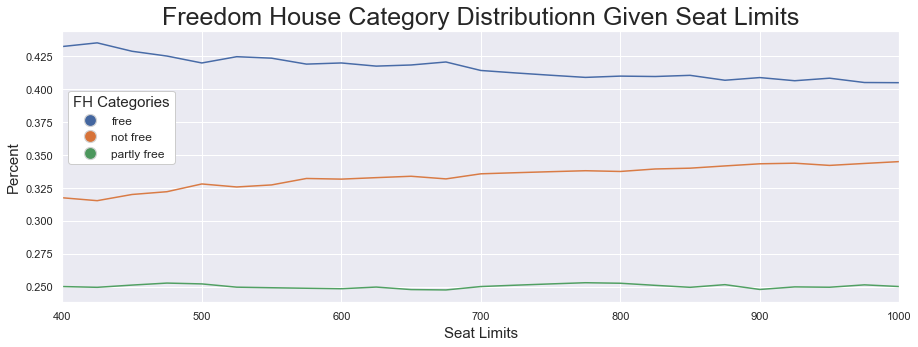

In [51]:
ax = stdviz.plot.comp_line(df=df_fh_alloc, 
                           dependent_cols=['prcnt_in_limit_{}'.format(limit) for limit in seat_limits], 
                           indep_stats=seat_limits,
                           lctn_col=None,
                           colors=None, 
                           stacked=False, 
                           percent=False, 
                           axis=None)

colors = [utils.rgb_to_hex(c) for c in sns.color_palette(n_colors=len(df_selected), desat=1)]
handles = stdviz.plot.legend.gen_handles(colors=colors, size=12, marker='o')
labels = categories

ax.legend(handles=handles, labels=labels, 
          title='FH Categories',
          bbox_to_anchor=(0, 0.8),
          ncol=1, loc='upper left', fontsize=12, 
          title_fontsize=15, 
          frameon=True, facecolor='#ffffff', framealpha=1)

ax.axes.set_title('Freedom House Category Distributionn Given Seat Limits', fontsize=25)
ax.set_xlabel('Seat Limits', fontsize=15)
ax.set_ylabel('Percent', fontsize=15)

plt.show()

## Disproportionality

To close we'll look at the how proportional the allocations at each limit and seat minimum are. The measure of disproportionality we'll use is the [Gallagher index](https://en.wikipedia.org/wiki/Gallagher_index), which is similar to sum of squared residuals between shares and allocations. It's typically used to derive the fairness of allocations given either votes or populations in comparison to their resulting representations. The equation is as follows:

$$LSq = \sqrt{\frac{1}{2}\sum_{i=1}^{n}(S_i - A_i)^2}$$

with $S_i$ and $A_i$ being the shares and allocations of group $i$ respectively. 

We'll compare how the indexes for parliaments change as the seat limit is increased, and further compare the degree that systems with one or two guaranteed allocations compare to coinciding systems without a minimum allocation:

In [52]:
df_dispr = pd.DataFrame(columns=['dispr_{}'.format(limit) for limit in seat_limits])
for msa in min_seat_amounts:
    df_dispr.loc[msa] = [appointment.metrics.dispr_index(shares=df_countries['population'].values, 
                                                         allocations=df_countries['msa_{}_{}'.format(msa, limit)].values, 
                                                         mertric_type='Gallagher') for limit in seat_limits]

for limit in seat_limits:
    df_dispr.loc[:, 'more_dispr_than_0_min_{}'.format(limit)] = \
        df_dispr['dispr_{}'.format(limit)] / df_dispr.loc[0, 'dispr_{}'.format(limit)]

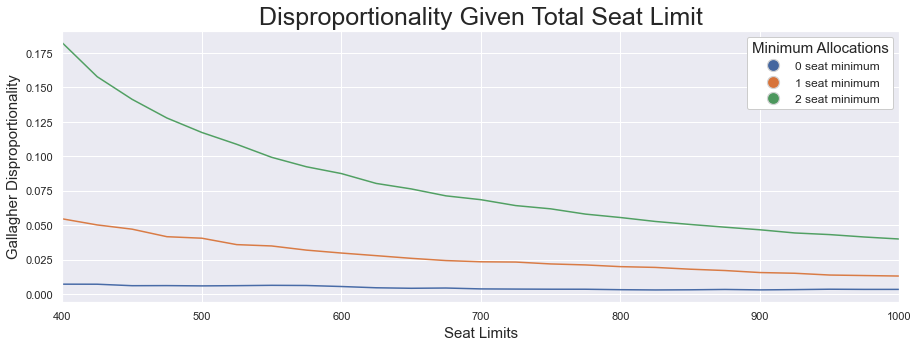

In [53]:
ax = stdviz.plot.comp_line(df=df_dispr, 
                           dependent_cols=['dispr_{}'.format(limit) for limit in seat_limits], 
                           indep_stats=seat_limits,
                           lctn_col=None,
                           colors=None, 
                           stacked=False, 
                           percent=False, 
                           axis=None)

colors = [utils.rgb_to_hex(c) for c in sns.color_palette(n_colors=len(df_selected), desat=1)]
handles = stdviz.plot.legend.gen_handles(colors=colors, size=12, marker='o')
labels = ['{} seat minimum'.format(i) for i in min_seat_amounts]

ax.legend(handles=handles, labels=labels, 
          title='Minimum Allocations',
          bbox_to_anchor=(1, 1),
          ncol=1, loc='upper right', fontsize=12, 
          title_fontsize=15, 
          frameon=True, facecolor='#ffffff', framealpha=1)

ax.axes.set_title('Disproportionality Given Total Seat Limit', fontsize=25)
ax.set_xlabel('Seat Limits', fontsize=15)
ax.set_ylabel('Gallagher Disproportionality', fontsize=15)

plt.show()

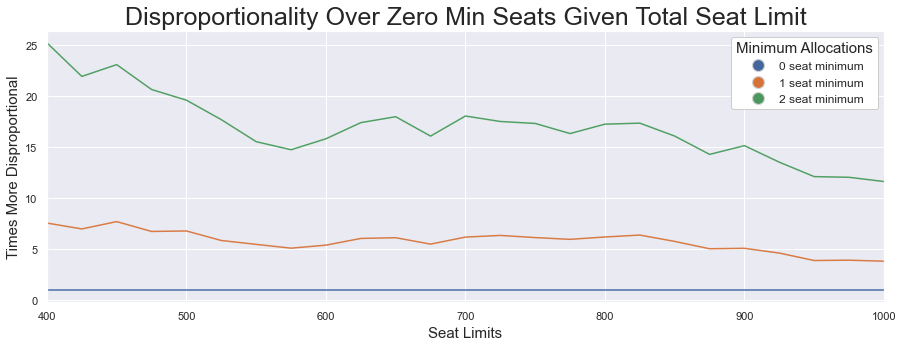

In [54]:
ax = stdviz.plot.comp_line(df=df_dispr, 
                           dependent_cols=['more_dispr_than_0_min_{}'.format(limit) for limit in seat_limits], 
                           indep_stats=seat_limits,
                           lctn_col=None,
                           colors=None, 
                           stacked=False, 
                           percent=False, 
                           axis=None)

colors = [utils.rgb_to_hex(c) for c in sns.color_palette(n_colors=len(df_selected), desat=1)]
handles = stdviz.plot.legned.gen_handles(colors=colors, size=12, marker='o')
labels = ['{} seat minimum'.format(i) for i in min_seat_amounts]

ax.legend(handles=handles, labels=labels, 
          title='Minimum Allocations',
          bbox_to_anchor=(1, 1),
          ncol=1, loc='upper right', fontsize=12, 
          title_fontsize=15, 
          frameon=True, facecolor='#ffffff', framealpha=1)

ax.axes.set_title('Disproportionality Over Zero Min Seats Given Total Seat Limit', fontsize=25)
ax.set_xlabel('Seat Limits', fontsize=15)
ax.set_ylabel('Times More Disproportional', fontsize=15)

plt.show()